# EDA del dataset "analisis.csv"

Importamos las librerias

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore") #ignoramos los warnings
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Descripcion de las columnas

- usuario (el nombre en Twitter)
- “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- “co” =Conscientiousness – grado de orden, prolijidad, organización
- “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
- “ag” = Agreeableness – grado de empatía con los demás, temperamento
- “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount – Cantidad promedio de palabras usadas en sus tweets
- Categoria – Actividad laboral del usuario (actor, cantante, etc.)

## Analisis inicial

Cargamos el data set y mostramos primeras columnas. Depsues un pequeño analisis incial de los datos.

In [2]:
df =  pd.read_csv("analisis.csv", header=0)
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


### Graficos

#### Diagramas de dispersion

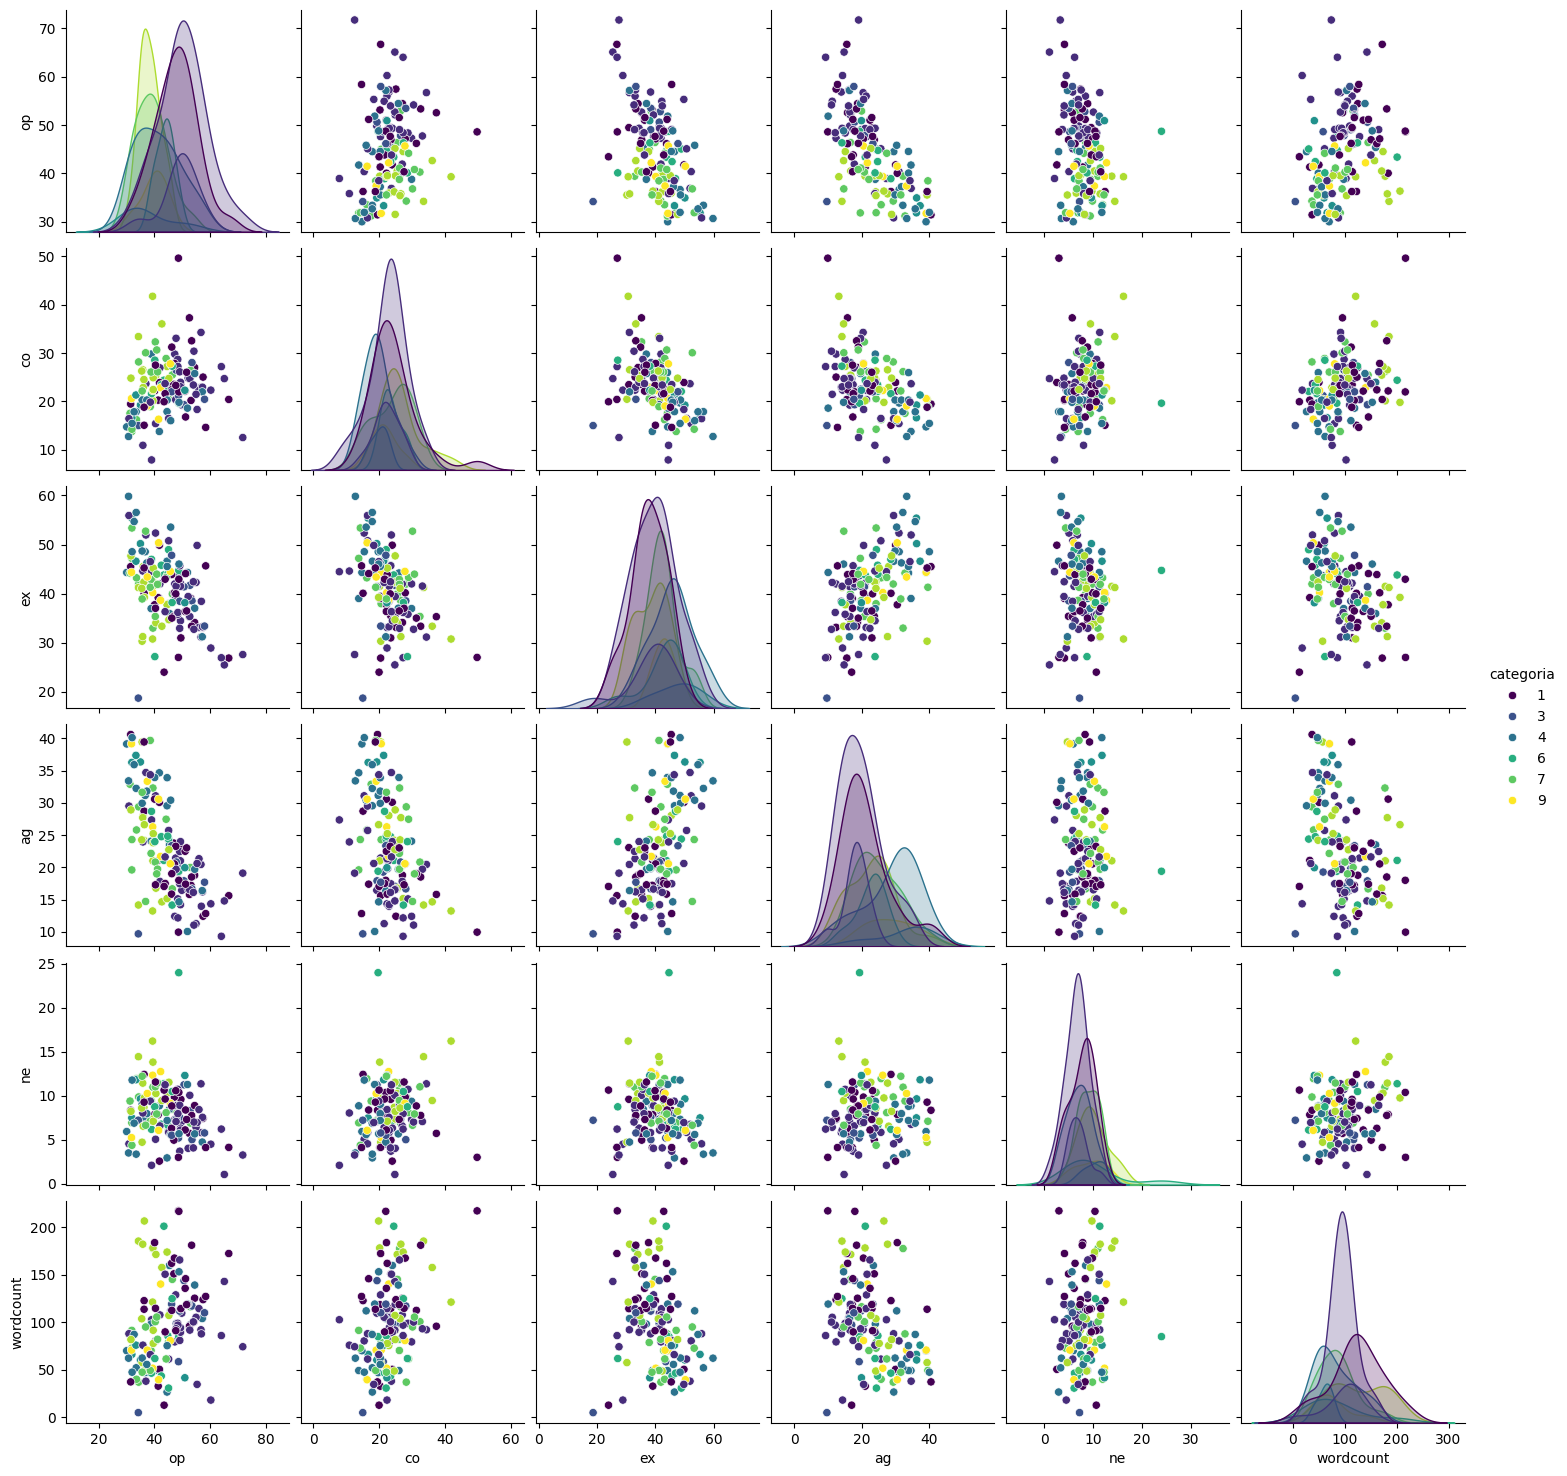

In [5]:
sns.pairplot(df.drop(columns=['usuario']), hue="categoria", palette="viridis")
plt.show()


#### Mapa de calor

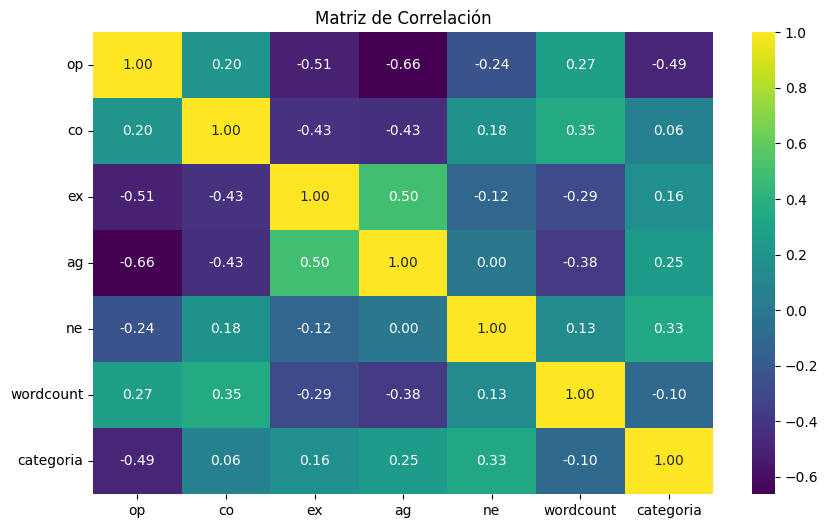

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['usuario']).corr(), annot=True, cmap="viridis", fmt=".2f")

plt.title("Matriz de Correlación")
plt.show()

#### Bigotes

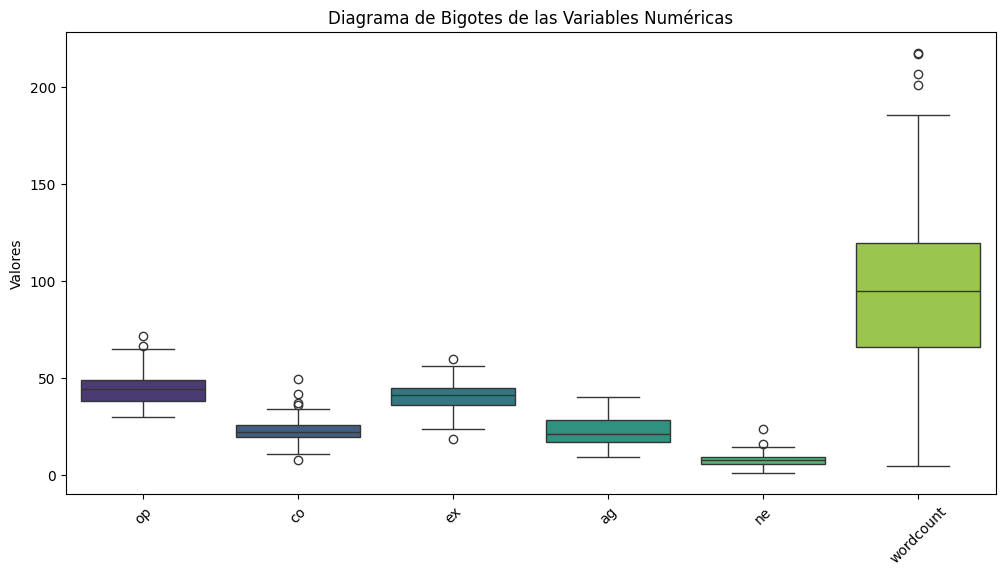

In [7]:
plt.figure(figsize=(12, 6))

# Crear boxplot para todas las columnas numéricas
sns.boxplot(data=df.drop(columns=['usuario', 'categoria']), palette="viridis")  # Eliminamos columnas categóricas

# Etiquetas
plt.title("Diagrama de Bigotes de las Variables Numéricas")
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
plt.ylabel("Valores")

# Mostrar gráfico
plt.show()

## Transformacion de los datos

Para facilitar el trabajo a los modelos ha decidido normalizar los valores de las columnas

In [8]:

stats_columns = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']

scaler = MinMaxScaler()
df[stats_columns] = scaler.fit_transform(df[stats_columns])
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,0.102638,0.485725,0.565391,0.641501,0.383967,0.151175,7
1,aguerosergiokun,0.359116,0.303292,0.467902,0.478723,0.406663,0.347735,7
2,albertochicote,0.281061,0.141023,0.493696,0.810161,0.340190,0.208518,4
3,AlejandroSanz,0.248507,0.180081,0.817966,0.696232,0.174393,0.355544,2
4,alfredocasero1,0.159427,0.282146,0.725415,0.698045,0.273474,0.198168,4


In [9]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.345384,0.361956,0.536596,0.435223,0.303722,0.441618,4.050000
std,0.202174,0.139209,0.174690,0.244815,0.132439,0.210754,2.658839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.196422,0.284492,0.423088,0.247625,0.220319,0.288447,2.000000
50%,0.347604,0.349741,0.553446,0.386178,0.296733,0.422745,3.500000
75%,0.464191,0.436492,0.644381,0.619394,0.380333,0.540563,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


Y por ultimo he decido eliminar la columna categoria tal y como pide el enunciado y despues lo gardo en un csv llamado analisis_clean.csv

In [10]:
# Eliminar la columna 'categoria'
df_cleaned = df.drop(columns=['categoria'])

# Guardar en un nuevo archivo CSV
df_cleaned.to_csv("analisis_clean.csv", index=False)
